# Topic: News Sentiment Analysis: Selecting Meaningful Words From News Articles

#### The result of this analysis can applied to our final project, where we will anlayze how news sentiment can effect the performance of ETFs

- We will start with news articles from Reuters, eventually expanding to multiple news sources
- Due to time constraints, the scope of the assinment will be limited to US equities market. 
- S&P 500 will serve as our market index for the time 


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import pandas_datareader.data as web
import re

### Collecting price data for S&P500

In [2]:
# grabs open, high, low, close price data for SP500
def SP500(startDate, endDate):
    sp = web.DataReader('^GSPC', 'yahoo', startDate, endDate)
    sp = sp.resample('D').ffill()
    return sp

startDate = dt.date(2018,10,1)
endDate = dt.date.today()
SP = SP500(startDate, endDate)
SP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,2937.060059,2917.909912,2926.290039,2924.590088,3364190000,2924.590088
2018-10-02,2931.419922,2919.370117,2923.800049,2923.429932,3401880000,2923.429932
2018-10-03,2939.860107,2921.360107,2931.689941,2925.510010,3598710000,2925.510010
2018-10-04,2919.780029,2883.919922,2919.350098,2901.610107,3496860000,2901.610107
2018-10-05,2909.639893,2869.290039,2902.540039,2885.570068,3328980000,2885.570068


### Collecting news articles from Reuters

In [3]:
# grab links to news articles from reuter's archive page
# ten articles are displayed on each page
url_links = []
for i in range(1,10):
    url = 'https://www.reuters.com/news/archive/marketsNews?view=page&page=' + str(i) + '&pageSize=10'
    html = requests.get(url)
    content = html.content
    content.decode().strip().replace('\t','').split('\n')
    soup = BeautifulSoup(content, "html.parser")
    for tags in soup.find_all('a'):
        if re.search('article', tags['href']):
            url_links.append(tags['href'])
            
# some linkes may be duplicated thus we only select those that only appear once
final_urls = []
for url in url_links:
    if url not in final_urls:
        final_urls.append(url)

In [4]:
# retreive the title, publish time and content for each article

title_all = []
time_all = []
content_all = []

for url in final_urls:
    link = 'https://www.reuters.com' + url
    page = requests.get(link).content
    soup = BeautifulSoup(page, "html.parser")
    newsTitle = soup.title.text
    newsTime = soup.find_all("div", {"class": 'ArticleHeader_date'})[0].text
    newsContent = ''
    for tag in soup.find_all('p'):
        newsContent += tag.text
        
    title_all.append(newsTitle)
    time_all.append(newsTime)
    content_all.append(newsContent)

# remove spaces infront of titles
title_all = [x.replace('  ', '') for x in title_all]
title_all = [x.replace('\n', '') for x in title_all]

In [29]:
# save all articles to one csv file
file = pd.DataFrame({'Title' : title_all, 'Time':time_all, 'Content':content_all})
file['Date'] = [x.split('/')[0] for x in file['Time'].tolist()]
file['Date'] = pd.to_datetime(file['Date'])
file.to_csv('articles.csv')
file.head(20)

,Title,Time,Content,Date
0,UPDATE 1-Investors return to euro zone havens ...,"May 6, 2019 / 10:51 AM / Updated 2 minutes ago",3 Min Read* Core euro zone bond yields fall as...,2019-05-06
1,UPDATE 1-Malaysia sends ex-Goldman banker to U...,"May 6, 2019 / 10:34 AM / in 2 minutes","3 Min Read(Changes sourcing, adds attorney gen...",2019-05-06
2,US STOCKS-Futures sink after Trump escalates C...,"May 6, 2019 / 10:36 AM / in a few seconds",3 Min Read(For a live blog on the U.S. stock m...,2019-05-06
3,Boeing 737 slides off runway in Russia's Noril...,"May 6, 2019 / 10:31 AM / in 16 minutes","1 Min ReadMOSCOW, May 6 (Reuters) - A Boeing 7...",2019-05-06
4,PRECIOUS-Gold gains as Trump's tariff threat d...,"May 6, 2019 / 10:16 AM / Updated 33 minutes ago",3 Min Read* Trump says he will hike U.S. tarif...,2019-05-06
5,German business lobby: Trump's new tariff thre...,"May 6, 2019 / 10:11 AM / Updated an hour ago","1 Min ReadBERLIN, May 6 (Reuters) - U.S. Presi...",2019-05-06
6,Stronger shekel a challenge for Israeli inflat...,"May 6, 2019 / 9:14 AM / in 2 hours","2 Min ReadJERUSALEM, May 6 (Reuters) - A stren...",2019-05-06
7,UPDATE 1-European shares slide as U.S.-China t...,"May 6, 2019 / 9:09 AM / a minute ago","4 Min Read* All sectors fall, auto stocks decl...",2019-05-06
8,EXPLAINER-Counting the cost of the U.S.-China ...,"May 6, 2019 / 9:06 AM / Updated 2 hours ago","6 Min ReadHONG KONG, May 6 (Reuters) - U.S. Pr...",2019-05-06
9,China trade team still preparing to go for tal...,"May 6, 2019 / 9:02 AM / Updated 2 hours ago",6 Min ReadBEIJING/WASHINGTON (Reuters) - China...,2019-05-06


### TF-IDF

In [30]:
# combine the content of all articles to one list
text_all = []
for content in file['Content']:
    text = content.split(' ')
    text = [x.lower() for x in text]
    text_all.append(text)


# calculate term frequency in each article
def computeReviewTFDict(reviews):
    # counts the number of times the word appears in review
    all_TFDict = []
    for review in reviews:
        reviewTFDict = {}
        for word in review:
            if word in reviewTFDict:
                reviewTFDict[word] += 1
            else:
                reviewTFDict[word] = 1
        all_TFDict.append(reviewTFDict)
    
    return all_TFDict

TF = computeReviewTFDict(text_all)
TF_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in TF]
wfm = pd.concat(TF_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,,#dirtydeeds,#internationalwomensday.,#lies,"#louisfarrakhan,",#maga,#maga”,#presidentsday2018”,#trumppence16”,$0.6960,...,“we’re,“we’ve,“what,“when,“while,“who,“with,“woodstock,“you,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
corpus = file['Content'].values.tolist()

from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

df_tfidf = pd.DataFrame(tfidf.toarray(), columns=word)
df_tfidf.head()

,00,000,002,01,010,0121,0130,014,02,0215,...,yutaka,zagreb,zealand,zengerle,zero,zhang,zhou,zieminski,zieminskiall,zone
0,0.0,0.0,0.049436,0.0,0.0,0.0,0.0,0.053775,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307789
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [32]:
df_tfidf.sum().reset_index().sort_values([0], ascending = False).head(10)

,index,0
5533,the,24.429348
5604,to,14.179001
3821,of,13.804704
573,and,11.702780
2816,in,11.321215
3852,on,8.538265
2334,for,7.118934
1060,by,5.724825
4046,percent,5.486445
4823,said,5.324282


In [33]:
df_tfidf.sum().reset_index().sort_values([0], ascending = False).tail(10)

,index,0
1766,dialogue,0.011065
3841,olaf,0.011065
638,apr,0.011065
4875,science,0.011065
95,1645,0.011065
3147,lagarde,0.011065
3836,ohlsson,0.011065
1172,chairperson,0.011065
1599,dalarna,0.011065
5114,snb,0.011065


Using TF-IDF we identify words such as 'the' and 'of' to be those that carry very little meaningful information about the actual content. In contrast, words such as 'crowds' and 'proposals' are the ones we are most interested in and will be used on our sentiment analysis.

In [34]:
# PCA
import numpy as np
from sklearn.decomposition import PCA

features = tfidf.toarray()
labels = file['Title'].values
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
file['pca1'] = pd.DataFrame(transData[:,0])
file['pca2'] = pd.DataFrame(transData[:,1])
file.head()

,Title,Time,Content,Date,pca1,pca2
0,UPDATE 1-Investors return to euro zone havens ...,"May 6, 2019 / 10:51 AM / Updated 2 minutes ago",3 Min Read* Core euro zone bond yields fall as...,2019-05-06,0.134145,-0.034580
1,UPDATE 1-Malaysia sends ex-Goldman banker to U...,"May 6, 2019 / 10:34 AM / in 2 minutes","3 Min Read(Changes sourcing, adds attorney gen...",2019-05-06,-0.117430,-0.118095
2,US STOCKS-Futures sink after Trump escalates C...,"May 6, 2019 / 10:36 AM / in a few seconds",3 Min Read(For a live blog on the U.S. stock m...,2019-05-06,0.221243,0.051125
3,Boeing 737 slides off runway in Russia's Noril...,"May 6, 2019 / 10:31 AM / in 16 minutes","1 Min ReadMOSCOW, May 6 (Reuters) - A Boeing 7...",2019-05-06,-0.147118,-0.045931
4,PRECIOUS-Gold gains as Trump's tariff threat d...,"May 6, 2019 / 10:16 AM / Updated 33 minutes ago",3 Min Read* Trump says he will hike U.S. tarif...,2019-05-06,0.175082,0.036377


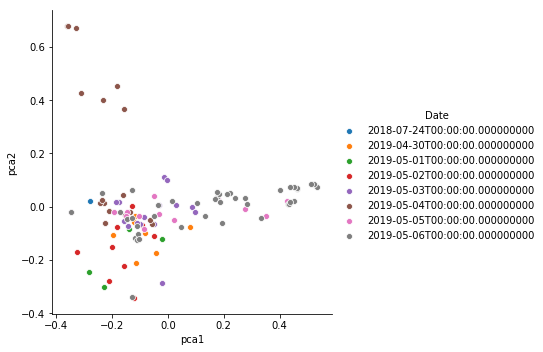

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data= file, hue="Date", size=5)